In [ ]:
from matplotlib import pyplot as plt
from pandas import DataFrame
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, log_loss
from sklearn.datasets import make_blobs

In [ ]:
# Mounting my drive so we can access the datasets - Dataset can be found at https://archive.ics.uci.edu/dataset/244/fertility
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the dataset
dataset_path = "/content/drive/My Drive/Datasets/fertility/fertility_Diagnosis.txt"
with open(dataset_path, 'r') as file:
  data = file.read()

# We need to format the data in such a way that we can interact with it considering that it's a text file right now
data = data.split("\n") # splitting the data into a list on newlines
data.pop() # getting rid of the final entry because data is not on the last line but there is a new line char at the end

# Now we have a list with 100 entries and we want to split this into a nested list such that every row is a data point and the final column is the diagnosis
temp = []
for entry in data:
  temp.append(list(entry.split(',')))
data = temp
print(data)
# we now have the data formatted in a such a way we can interact with it, lets turn it into a pandas dataframe for ease of access

[['-0.33', '0.69', '0', '1', '1', '0', '0.8', '0', '0.88', 'N'], ['-0.33', '0.94', '1', '0', '1', '0', '0.8', '1', '0.31', 'O'], ['-0.33', '0.5', '1', '0', '0', '0', '1', '-1', '0.5', 'N'], ['-0.33', '0.75', '0', '1', '1', '0', '1', '-1', '0.38', 'N'], ['-0.33', '0.67', '1', '1', '0', '0', '0.8', '-1', '0.5', 'O'], ['-0.33', '0.67', '1', '0', '1', '0', '0.8', '0', '0.5', 'N'], ['-0.33', '0.67', '0', '0', '0', '-1', '0.8', '-1', '0.44', 'N'], ['-0.33', '1', '1', '1', '1', '0', '0.6', '-1', '0.38', 'N'], ['1', '0.64', '0', '0', '1', '0', '0.8', '-1', '0.25', 'N'], ['1', '0.61', '1', '0', '0', '0', '1', '-1', '0.25', 'N'], ['1', '0.67', '1', '1', '0', '-1', '0.8', '0', '0.31', 'N'], ['1', '0.78', '1', '1', '1', '0', '0.6', '0', '0.13', 'N'], ['1', '0.75', '1', '1', '1', '0', '0.8', '1', '0.25', 'N'], ['1', '0.81', '1', '0', '0', '0', '1', '-1', '0.38', 'N'], ['1', '0.94', '1', '1', '1', '0', '0.2', '-1', '0.25', 'N'], ['1', '0.81', '1', '1', '0', '0', '1', '1', '0.5', 'N'], ['1', '0.64', 

In [ ]:
dataDF = DataFrame(data)
# Lets add the titles of the columns into our DF so that we can see more easily what's going on
dataDF.columns = ["Season", "Age", "Child Diaseases", "Accident", "Surgical Intervention", "High Fevers", "Alcohol", "Smoking", "Hours Sitting", "Diagnosis"]
print(dataDF)

   Season   Age Child Diaseases Accident Surgical Intervention High Fevers  \
0   -0.33  0.69               0        1                     1           0   
1   -0.33  0.94               1        0                     1           0   
2   -0.33   0.5               1        0                     0           0   
3   -0.33  0.75               0        1                     1           0   
4   -0.33  0.67               1        1                     0           0   
..    ...   ...             ...      ...                   ...         ...   
95     -1  0.67               1        0                     0           0   
96     -1  0.61               1        0                     0           0   
97     -1  0.67               1        1                     1           0   
98     -1  0.64               1        0                     1           0   
99     -1  0.69               0        1                     1           0   

   Alcohol Smoking Hours Sitting Diagnosis  
0      0.8       0

In [ ]:
# Let's now split our dataset into the feature vectors and the y vector
X = dataDF.iloc[:, :-1].values  # Features
# Converting the X values to floats
X = np.array(X, dtype=np.float32)
Y = dataDF.iloc[:, -1].values   # Target variable

# Now we need to change our Y vector into something actually usable rather than string values so lets change them to np.float32 values with 0.0 -> N and 1.0 -> O
Y = np.array([0 if value == "N" else 1 for value in Y], dtype=np.float32) # N -> normal fertility, O -> altered

# and prepare our weights
w = np.array([1.0 for i in range(10)]) # 9 feature vectors + 1 bias term
print(w)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# Now that we have everything prepared in terms of data preprocessing; we need to adjust the grad, hw, cost, and descent functions to allow for a 1x10 vectors
# These are the same functions that David provided however we have adapated them to work with abitrary sized vectors!
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def hw(w, X):
  z = np.dot(X, w[:-1]) + w[-1]
  return sigmoid(z)

def cost(w, X, Y):
  y_pred = hw(w, X)
  return -1 * np.sum(Y*np.log(y_pred) + (1 - Y) * np.log(1 - y_pred))

def grad(w, X, Y):
  y_pred = hw(w, X)
  g = np.zeros_like(w)
  g[:-1] = -np.dot(X.T, (Y * 1 - y_pred) - (1-Y)*y_pred)
  g[-1] = -np.sum(Y*(1-y_pred) - (1-Y)*y_pred)
  return g

def descent(w_new, w_prev, lr, X, Y, epochs):
  j = 0
  while True:
    w_prev = w_new
    w_new -= lr * grad(w_prev, X, Y)
    print("Cost(new): ", cost(w_new, X, Y))
    if j > epochs:
      return w_new
    j += 1

In [ ]:
# Converting X into a numpy array prior to training
X = np.array(X, dtype=np.float32)

# Let's do our train/test split so that we train and test our model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Training - Don't need to normalize the values of our features vectors as they are already "prenormalized" into the range [0, 1] for most and [-1, 1] for season, high fevers, smoking:
w = descent(w, w, 0.0099, X_train, Y_train, 100)
print(w)

Cost(new):  26.021844486366625
Cost(new):  26.02292615647822
Cost(new):  26.024201232567783
Cost(new):  26.02566675169733
Cost(new):  26.027319834517172
Cost(new):  26.029157682112267
Cost(new):  26.03117757298738
Cost(new):  26.03337686018387
Cost(new):  26.035752968521166
Cost(new):  26.038303391956816
Cost(new):  26.041025691059033
Cost(new):  26.043917490586306
Cost(new):  26.04697647716873
Cost(new):  26.050200397086336
Cost(new):  26.053587054139616
Cost(new):  26.057134307608052
Cost(new):  26.060840070292503
Cost(new):  26.064702306637514
Cost(new):  26.06871903093002
Cost(new):  26.072888305570856
Cost(new):  26.07720823941588
Cost(new):  26.08167698618356
Cost(new):  26.08629274292607
Cost(new):  26.09105374856121
Cost(new):  26.09595828246227
Cost(new):  26.101004663103552
Cost(new):  26.106191246758964
Cost(new):  26.111516426251555
Cost(new):  26.116978629751667
Cost(new):  26.122576319621757
Cost(new):  26.128307991305807
Cost(new):  26.134172172261525
Cost(new):  26.1401

Based on our results, our cost function got minimized to about 26 (still need to check if this underfitting/overfitting) however we get a general weight vector of approximately [0.618 -> season | season doesn't play a large role in fertility, -1.537 -> age | i.e. negative trend as you get older, -0.972 -> child diseases | if you're having defective children your fertility is likely messed up, -1.551 -> accident | reproductive organ damage has high negative impact on fertility, 0.397 -> surgical intervention | seems to have a negative impact on fertility, -0.475 -> high fevers | negative general heatlh -> negative fertility health, -3.098 -> alcohol | alcohol usage decreases fertility drastically, 0.504 -> smoking | not a major factor in determing fertility here, -1.226 -> hrs sitting | if you're sitting a lot on your reproductive organs untop of the simple pressure added, they heat up and this is known to decrease fertility, 2.664 -> bias for "other factors"]

In [ ]:
# Let's now evaluate our model so that we can compare the results against another logistic regression model
def test(X, Y, w):
  hits = 0
  for i in range(X.shape[0]):
    pred = np.dot(X[i], w[:-1]) + w[-1]
    if pred <= 0 and Y[i] == 0:
      hits += 1
    elif pred > 0 and Y[i] == 1:
      hits += 1
  return hits/Y.shape[0] * 100

print(test(X_test, Y_test, w))

90.0


Let's now compare our results against sci-kit learn logistic regression to see if our results are logical and on point!

In [ ]:
LRModel = LogisticRegression(fit_intercept=True) # Adding a bias term so that the results are more comprable to our earlier model since we used a bias term
# Let's now split our X and Y into train and test splits so we can validate the results through scikit learn logistic regression but then compare the weights
# to the weights we achieved to validate our model

LRModel.fit(X_train, Y_train)
predictions = LRModel.predict(X_test)
accuracy = LRModel.score(X_test, Y_test)
print("Predictions: ", predictions)
print("Accuracy: ", accuracy)

Predictions:  ['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N']
Accuracy:  0.9


90% accuracy on a small dataset (n=100) seems fairly reasonable, now let's take a look at the weights of the model and compare them to our earlier results

In [ ]:
# Looking at the weights of the model
LRModelWeights = LRModel.coef_
print("Weights shape: ", LRModelWeights.shape)
print("Weights: ", LRModelWeights)

Weights shape:  (1, 9)
Weights:  [[ 0.87196644  0.50640633  0.12667004 -0.98353417  0.7944421  -0.05648944
  -0.45796205  0.39349152 -0.13872843]]


LRModel Weights: [0.87196644, 0.50640633, 0.12667004, -0.98353417, 0.7944421, -0.05648944, -0.45796205, 0.39349152, -0.13872843]

Our Model: [0.61833329, -1.53673251, -0.97205016, -1.55106849, 0.39668052, -0.47507608, -3.09768701, 0.50359419, -1.25550857, 2.66415692]

Both models were able to achieve a 90% accuracy on the testing data (they both had the same testing and training data as we used the same testing and training data) so as of now, it seems both models have reached a local optimum (because they have different weights and biases yet achieve the same accuracy) so we should look at other metrics such as the confusion matrices, precision, recall, F1 score, ROC, AUC, and log loss to be able to draw out other potential differences between the models.

Confusion Matrix:
 [[18  0]
 [ 2  0]]
Precision:  0.9
Recall:  1.0
F1 Score:  0.9473684210526316
Log Loss:  0.46504817690473904


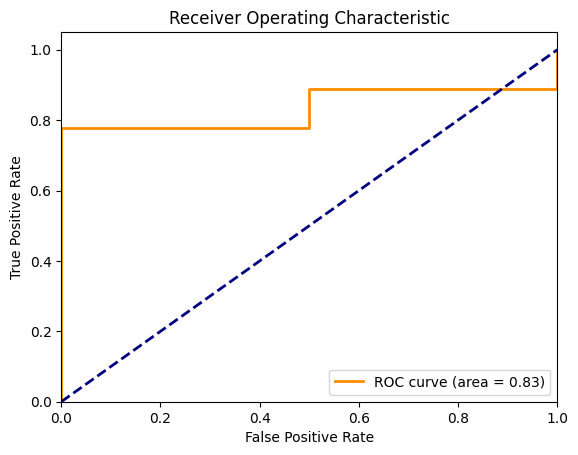

In [ ]:
# Let's begin by grabbing these metrics from the scikit learn model and then we can implement our own functions for analysis for our LR model and compare
Y_proba = LRModel.predict_proba(X_test)[:, 1]
print("Confusion Matrix:\n", confusion_matrix(Y_test, predictions))
print("Precision: ", precision_score(Y_test, predictions, pos_label="N"))
print("Recall: ", recall_score(Y_test, predictions, pos_label="N"))
print("F1 Score: ", f1_score(Y_test, predictions, pos_label="N"))
print("Log Loss: ", log_loss(Y_test, Y_proba))
fpr, tpr, thresholds = roc_curve(Y_test, Y_proba, pos_label="N")
roc_auc = auc(fpr, tpr)

# Let's now plot the AUC/ROC curve
plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Now we need to implement these functions for our model so that we can compare them against the results of the SKlearn model
def preds(X, Y, w):
  hits = []
  for i in range(X.shape[0]):
    pred = np.dot(X[i], w[:-1]) + w[-1]
    if pred <= 0 and Y[i] == 0:
      hits.append("O")
    elif pred > 0 and Y[i] == 1:
      hits.append("O")
    else:
      hits.append("N")
  return hits

def confusionMatrix(Y_true, Y_pred):
  classes = sorted(set(Y_true))
  n_classes = len(classes)
  confusionMatrix = [[0] * n_classes for _ in range(n_classes)]

  for true, pred in zip(Y_true, Y_pred):
    true_ind = classes.index(true)
    pred_ind = classes.index(pred)
    confusionMatrix[true_ind][pred_ind] += 1
  for row in confusionMatrix:
    print(row)

def precision(Y_true, Y_pred, posLabel):
  truePositives = sum((true == posLabel) and (pred == posLabel) for true, pred in zip(Y_true, Y_pred))
  falsePositives = sum((true != posLabel) and (pred == posLabel) for true, pred in zip(Y_true, Y_pred))
  if truePositives + falsePositives == 0: return 0.0
  else:
    return truePositives / (truePositives + falsePositives)

def recall(Y_true, Y_pred, posLabel):
  true_positives = sum((true == posLabel) and (pred == posLabel) for true, pred in zip(Y_true, Y_pred))
  false_negatives = sum((true == posLabel) and (pred != posLabel) for true, pred in zip(Y_true, Y_pred))

  if true_positives + false_negatives == 0: return 0.0
  else:
      return true_positives / (true_positives + false_negatives)

def F1Score(Y_true, Y_pred, posLabel):
  prec = precision(Y_true, Y_pred, posLabel)
  rec = recall(Y_true, Y_pred, posLabel)
  if prec + rec == 0: return 0.0
  else:
    return (prec * rec) / (prec + rec)

def logLoss(Y_true, Y_pred_prob):
    N = len(Y_true)
    logloss = 0.0
    for i in range(N):
        if Y_true[i] == 1:
            logloss -= np.log(Y_pred_prob[i])
        else:
            logloss -= np.log(1 - Y_pred_prob[i])
    return logloss / N

[18, 0]
[2, 0]
Precision:  0.9
Recall:  1.0
F1Score:  0.4736842105263158
Logloss:  0.03591288391047912


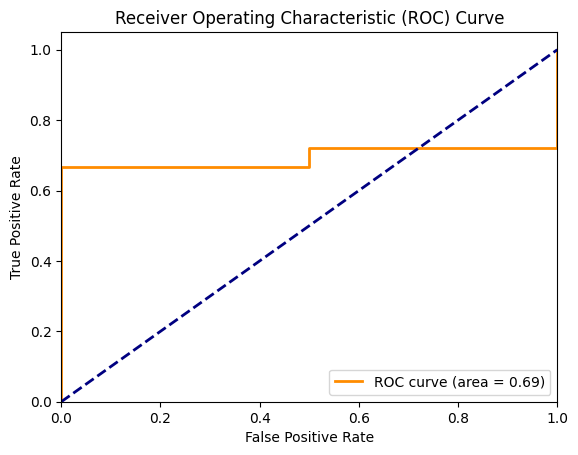

In [ ]:
# Let's now calculate our other metrics from our model and compare them to the SKLearn model
pred = preds(X_test, Y_test, w) # calculating our prediction array for our functions
predProb = sigmoid(np.dot(X_test, w[:-1]) + w[-1])
confMatrix = confusionMatrix(Y_test, pred)
print("Precision: ", precision(Y_test, pred, "N"))
print("Recall: ", recall(Y_test, pred, "N"))
print("F1Score: ", F1Score(Y_test, pred, "N"))
print("Logloss: ", logLoss(Y_test, predProb))

# Let's now make our ROC graph
fpr, tpr, _ = roc_curve(Y_test, predProb, pos_label="N")
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Final Analysis: Our model and the Sci-kit learn model were both able to achieve the same confusion matrix, precision, and recall however we see discrepencies between the two models in the F1 scores, log loss, and the ROC Curves. This can be enterpreted as differences in predictive power between the two models: a high F1 score, seen in the scikit learn model, is related to a good balance between precision and recall given how the F1 score is calculated. Furthemore, the log loss can be interpreted as the models ability to predict accurately on unseen data which can be seen in our handcrafted model. This could likely be explained via the underworkings of the scikit learn model and how many epochs it trains on the test data whereas with our handcrafted model we can control the epochs - in fact, when we forcefully overtrain on our model (epochs >= 200) we see a massive decrease in accuracy, precision, and therefore a sky rocket in our log loss value. So, in final, our model likely would perform well as long as we balance underfitting/overfitting however it wouldn't be unwise to say the scikit learn model is more confident as it comes from a trusted coding source rather than our hacked together monstrosity.